# Homework 6: Logistic Regression

In this homework we will implement the Logistic Regression algorithm using Gradient Descent.

We use as reference the chapter 9 and 24 of Understanding Machine Learning.

Copy this notebook and insert the corresponding names on the file.


## Important!


1.   **You shall send this TP by mail with the subject: [HW6][Student_1][MICAS][Student_2][SI221]** (Adapt the subject accordingly to your specific situation).

2.   **This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.**

3. **You have one week to deliver the homework.**

4. **Comment your code. If you leave an algorithm unfinished or you believe it may have a problem handling specific cases, we will consider this for evaluation.**

5. **We strongly encourage discussion between students as long as you own your solution. Copy pasting the solution from internet/colleagues will not be tolerated.**


**Send your solutions to both mails:**

<code>breno.skuk@gmail.com<br>
ibrahim.djemai@telecom-sudparis.eu</code>

(Feel free to send an email if you have any question concerning the TP)

**Good luck!**


# Part 1: From theory to algorithm
## Logistic Regression in a nutshell

Here we will take a look into the Logistic Regression algorithmic paradigm used for binary classification.

Moreover, the hypothesis class does not output the label directly, but it's maximum a posteriori likelihood (a value in the interval $[0,1]$).

This method can be "seen" either by the machine learning point of view as well as from the statistcal point of view.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png" width=400/>

**Figure 1** : Sigmoid Function.

Let us define the logistic function $\sigma: \mathbb{R} → [0,1]$ (also known as sigmoid, see **Figure 1**) as follows:

$$\sigma(x) = \frac{e^{x}}{1+e^{x}} = \frac{1}{1+e^{-x}} = 1 - \sigma(-x) \tag{1}$$

Given a set of input data from $X \in \mathbb{R}^d$, and their corresponding labels from $Y \in \{0, 1\}$, the goal of Logistic Regression is to map the input $X$ via a Hypothesis function $\mathcal{h}_W$ with parameters $W$ to $Y$.

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \sigma(\langle W, x \rangle ): W \in \mathbb{R}^d \}$$

such that for $\mathcal{h}_W \in \mathcal{H}_W$ we write

$$ \mathcal{h}_W:X \in \mathbb{R}^d → [0, 1]$$

$$\mathcal{h}_W(x) = \sigma(\langle W \cdot X \rangle)$$

Where $\sigma:x \in \mathbb{R} → [0, 1]$ is the **sigmoid** or the **logistic** function, as previously defined in $(1)$.


An interesting property of the $\sigma$ function that partly motivates its use is given by it's derivative, as expressed below:

\begin{align} \tag{2}
\sigma'(x) &= \frac{d}{dx} \frac{1}{1+e^{-x}} \\
&= \frac{-1}{(1+e^{-x})^2} (-e^{-x}) \\
&= \frac{1}{1+e^{-x}} \cdot \big(\frac{e^{-x}}{1+e^{-x}}\big)\\
&= \sigma(x) \cdot \sigma(-x)\\
&= \sigma(x) (1-\sigma(x))
\end{align}

## Prediction

Notice that the hypothesis class $\mathcal{H}_W$ does not contain functions that map the input to $\{0,1\}$, but instead to the interval $[0,1]$.

We will show in the following section the probabilistic interpretation of this hypothesis class, and motivate the following labeling rule:

$$
    y_{pred}=
\begin{cases} \tag{3}
    1 & \text{if } \mathcal{h}_W(x) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
$$

Note in view of Figure 1 that when $\langle W \cdot X \rangle$ is very large then $\sigma(\langle W \cdot X \rangle)$ is close to 1, whereas if
$\langle W \cdot X \rangle$ is very small then $\sigma(\langle W \cdot X \rangle)$ is close to 0.

Remember that $\langle W \cdot X \rangle$ is was precisely the distance of $x$ to a hyperplane corresponding to $W$.
There is a resemblance on how we performed the prediction on the perceptron and SVM, where we based our analisys by studying  $sign(\langle W \cdot X \rangle)$.  

However, our halfpsace prediction was being performed with $\{-1,1\}$ labels whereas now we are working with $\{0,1\}$

## Probabilistic Model
Let $S^N = (x_i,y_i)_{i\in[N]} \overset{\mathrm{iid}}{\sim} (X,Y)^N$ be a training set with $N$ samples.

If we assume that:
$$ p(y_i = 1 | x_i, W) = \mathcal{h}_W(x_i) $$
$$ p(y_i = 0 | x_i, W) = 1 - \mathcal{h}_W(x_i) $$

We can write the equations above compactly as:

$$ p(y_i | x_i, W) = (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \tag{4}$$

We can write the likelihood of the parameters as product of the likelihood for each point as follow (where we make use of the $\mathrm{iid}$ sampling):

\begin{align}
L(W) &= p(Y^N | X^N, W)\\
&= \prod^N_{i=1} p(y_i | x_i, W) \\
&= \prod^N_{i=1} (\mathcal{h}_W(x_i))^{y_i} \cdot (1 - \mathcal{h}_W(x_i))^{1-y_i} \\ \tag{5}
\end{align}

This is the well established statistical problem of finding a Maximum Likelihood Estimator, and we write the optimization as:

$$
W = arg \max_{W' \in \mathbb{R^d}} L(W') \tag{6}
$$


We can conviniently write an equivalent optimization problem by maximizing the log likelihood. This is possible because $log$ is a monotonically increasing function:

\begin{align} \tag{7}
\mathcal{L}(W) &= \log L(W) \\
&= \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1-y_i) \log(1-\mathcal{h}_W(x_i))
\end{align}

The parameter $W$ is then given by:

$$
W = arg \max_{W' \in \mathbb{R^d}} \mathcal{L}(W')  \tag{8}
$$

To solve the maximization problem, we use **gradient ascent**. Written in vectorial notation, our updates will therefore be given by $W ← W + lr \cdot \nabla_W \mathcal{L}(W)$. (Note the positive rather than negative sign in the update formula, remember that we’re maximizing, rather than minimizing a function now)

With the change of representation of $x_i$ to facilitate the notation:
$W = [w_1, w_2, ..., w_j, ..., w_d], \quad x_i = [x_1^{(i)}, x_2^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}]$

For any given sample, the gradient of the logistic loss function with respect to $W$ is given by :
$$\nabla \mathcal{L}(W) = \left[\frac{\partial \mathcal{L}(W)}{\partial w_1}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_j}, \cdots, \frac{\partial \mathcal{L}(W)}{\partial w_d}\right] $$

The derivative of the likelihood with respect to a single coordinate can be easily obtained by using $(2)$ as:

$$ \frac{\partial}{\partial w_j} \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1}\left(y^{(i)}-\mathcal{h}_W(x^{(i)})\right) x_j^{(i)}$$

For each coordinate we have:

$$\nabla \mathcal{L}(W) = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) \cdot\left[x_1^{(i)}, ..., x_j^{(i)}, ..., x_d^{(i)}\right] = \frac{1}{N} \sum^N_{i=1} \left(y^{(i)}-h_W(x^{(i)})\right) x^{(i)} $$

Finally, the gradient ascent step is given by:

$$ W^{(t+1)} ← W^{(t)} + lr \cdot \frac{1}{N} \sum^N_{i=1} \left(y_i-h_W(x_i)\right) x_i$$

## Question 1:
(a) In the deduction above we atack the problem of learning through data from the statistical point of view.

Usually, in machile learning we would choose a loss function $l_{logistic}$, write the Empirical Risk as the average value of the loss, and finally verify that for our $\mathcal{H}_W$,  $\mathcal{h}_W \in ERM_{h_W' \in \mathcal{H}_W} (\mathcal{L}(\mathcal{h}'_W))$ is minimizing the true Risk.

Can you spot the analogous to the loss function in $(7)$? Can this problem be made equivalent to a binary classification into $\{-1,1\}$?

(b) Discuss the similarities between linear regression and logistic regression. What types of problems are the most appropriate for them? Are they equivalent in some way?

**ANSWER (A):**

In equation (7), we see the expression for the **log-likelihood** function (which can also be interpreted as the negative log-loss or logistic loss function):


$\mathcal{L}(W) = \log L(W) = \sum_{i=1}^{N} y_i \log(\mathcal{h}_W(x_i)) + (1 - y_i) \log(1 - \mathcal{h}_W(x_i))
\$

This function is **analogous** to the **logistic loss function** typically used in binary classification tasks within machine learning. Specifically, it is the **log-loss** or **cross-entropy loss** function, where:

- $ \mathcal{h}_W(x_i) $ is the model's predicted probability that sample $i$ belongs to the positive class (i.e., $ P(y_i = 1 | x_i) $).
- $ y_i \in \{0, 1\} $ is the actual label, indicating whether the sample belongs to the positive or negative class.

The goal in logistic regression is to minimize this loss function over all data points, which corresponds to finding the parameters $W$ that maximize the log-likelihood or, equivalently, minimize the **empirical risk**.

Thus, the loss function in (7) is analogous to the typical **logistic loss** $ l_{\text{logistic}} $, which is minimized during the training process to ensure that the model's predictions align with the true labels.

We could map the predictions such that the decision boundary remains the same: if $h_W(x_i) > 0.5$, predict 1; otherwise, predict -1.

This formulation doesn't change the underlying probabilistic model, but instead just alters how the output labels are interpreted.

**ANSWER (B):**

1. **Model Structure**:
   - Both models are **linear** in nature. The difference is in how they model the outcome:
     - In **linear regression**, the output $y$ is continuous and is modeled as a linear combination of input features $x_i$, i.e., $y = W^T x + b$.
     - In **logistic regression**, the output $y \in \{0,1\}$ (or probabilities) is modeled using a sigmoid function on top of a linear combination of features, i.e., $h_W(x) = \sigma(W^T x + b)$, where $\sigma(z) = \frac{1}{1 + e^{-z}}$.

2. **Objective**:
   - In **linear regression**, we aim to minimize the **mean squared error (MSE)** between predicted and true values.
   - In **logistic regression**, we aim to minimize the **log-loss** or **cross-entropy loss** between predicted probabilities and true labels.

3. **Optimization**:
   - Both models are typically trained using **gradient descent** methods, where the gradients of the respective loss functions with respect to the weights $W$ are calculated, and the weights are updated iteratively.

4. **Most Appropriate Problems**:
   - **Linear regression** is suited for **regression tasks**, where the output is a continuous variable (e.g., predicting house prices, stock market values).
   - **Logistic regression** is suited for **binary classification tasks**, where the goal is to predict a binary outcome (e.g., whether a passenger survived the Titanic or not, disease detection).

5. **Equivalence**:
   - While linear and logistic regression are conceptually similar in that they both fit a linear decision boundary, they are **not equivalent** because their objectives and output interpretations differ.
     - **Linear regression** is inappropriate for classification tasks, as it can predict values outside the $[0,1]$ range.
     - **Logistic regression** uses the **sigmoid function** to constrain predictions between 0 and 1, making it well-suited for probabilistic binary classification.

## Question 2:
Fill out the code snippets below to implement the Logistic Regression and test its results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import kagglehub
# Your Imports go here

### Compute the logistic (also known as sigmoid) function

In [ ]:
def sigmoid(u):
  """
  Compute the sigmoid

  Parameters:
  -----------
  `u` : real number


  Returns:
  --------
  `sigma` : Computed sigma(u)

  """
  return 1 / (1 + np.exp(-u))

### Compute the cost and its gradient using previously defined equations

In [ ]:
def getCost(W, X, Y):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `J` : Computed cost

  """
  h = sigmoid(np.dot(W.T, X))
  J = -np.mean(Y * np.log(h) + (1 - Y) * np.log(1 - h))
  return J

def getGradients(W, X, Y):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `dJ` : Computed gradients

  """
  N = X.shape[1]
  h = sigmoid(np.dot(W.T, X))
  dJ = np.dot(X, (h - Y).T) / N
  return dJ

### Perform a Gradient Descent Step

In [ ]:
def gradDescent(W, X, Y, lr):
  """
  Update the weights with gradient descent

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lr` : Learning Rate

  Returns:
  --------
  `W` : Updated weights [d x 1]

  """
  dJ = getGradients(W, X, Y)
  W = W - lr * dJ

  return W

### Logistic Regression functions for training and testing

In [ ]:
def logRegTrain(X, Y, lr, maxEpochs=2500, minCostDiff=1e-4):
  """
  Train the Logistic Regression Model

  Parameters:
  -----------
  `X` : Training inputs [d x N]
  `Y` : Training Labels [1 x N]
  `lr` : Learning Rate
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]

  """
  d = X.shape[0]
  # Randomly initialze the weights
  W = np.random.randn(d, 1)
  Js = []
  converged = False # Boolean variable for convergence critereon
  J_prev = None
  while not converged:
    # Update the weights
    W = gradDescent(W, X, Y, lr)
    # Compute the cost
    J = getCost(W, X, Y)
    Js.append(J)
    # Check if the convergence critereon is met
    if J_prev is not None and abs(J_prev - J) <= minCostDiff:
      converged = True
    else:
      J_prev = J
    # Decrement the number of epochs
    maxEpochs -= 1
    # Check if the maximum number of epochs is reached
    if maxEpochs == 0:
      break
  return W, np.array(Js)

In [ ]:
def logResTest(W, X, Y = np.array([])):
  """
  Test the SVM Model

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `A` : Accuracy
  `P` : Precision
  `R` : Recall

  """
  N = X.shape[1]

  # Make predictions using the learned weights
  predictions = sigmoid(np.dot(W.T, X))  # [1 x N]
  pred_labels = np.zeros(N)  # Predicted labels [1 x N] flattened
  pred_labels[predictions[0,:] >= 0.5] = 1
  if Y.size == 0:
    return pred_labels
  else:
    # Compute accuracy, precision, and recall using scikit-learn's built-in functions
    acc = accuracy_score(Y.flatten(), pred_labels)
    P = precision_score(Y.flatten(), pred_labels, zero_division=0)
    R = recall_score(Y.flatten(), pred_labels, zero_division=0)
    return pred_labels, acc, P, R


### Plot the data and the results
Functions for :

- Getting the decision boundry from the weights and plotting it with the data.

- Cost function evolution.

In [ ]:
def plotData(X, Y, var, W=np.array([]), tick_labels=None):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]

  """
  plt.figure(figsize=(7,5))
  sc = plt.scatter(X[0, :], X[1, :], c=Y[0,:], cmap='bwr')
  cb = plt.colorbar(sc)
  cb.set_ticks(np.sort(np.unique(Y)))
  if tick_labels != None:
    cb.set_ticklabels( tick_labels )
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(f'Generated Dataset(Variance = {var})')
  plt.grid(True, linestyle='--', linewidth=0.5)
  if W.size != 0:
    # Plot the decision boundary
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    x = np.linspace(x_min, x_max, 100)
    y = -(W[0, 0] * x) / W[1, 0]
    plt.plot(x, y, 'k--', label='Decision Boundary')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title(f'Classification (Variance = {var})')
  plt.show()

def plotConvCurve(Js, lr):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  plt.figure(figsize=(7,5))
  plt.plot(Js)
  plt.xlabel('Epoch')
  plt.ylabel('Cost')
  plt.title(f'Cost Function Evolution (lr = {lr})')
  plt.show()

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [ ]:
# Generate a random permutation of indices
def shuffle_data(X,Y):
    """
    Parameters:
    -----------
    X: R2 points [2 x N]
    Y: Labels [1 x N]

    Returns:
    --------
    permutated X: R2 points [2 x N]
    permutated Y: Labels [1 x N]

    """
    permutation = np.random.permutation(len(Y))
    return X[permutation], Y[permutation]

In [ ]:
def genData(meanPos, meanNeg, var, N, shuffle = 1):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation

  Returns:
  --------
  `X` : Input Data
  `Y` : Labels

  """
  #  Create zero data
  X_zero = np.random.multivariate_normal(meanNeg, var * np.identity(2), int(N/2))

  # Create ones data
  X_one = np.random.multivariate_normal(meanPos, var * np.identity(2), int(N/2))

  # Concatenate arrays along axis 0
  X = np.concatenate((X_zero, X_one), axis=0)

  # Create an array filled with ones and another filled with zeros
  ones_array = np.ones((int(N/2),1))
  zeros_array = np.zeros((int(N/2),1))

  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((ones_array, zeros_array), axis=0)

  if shuffle:
    # shuffle data
    X,Y = shuffle_data(X,Y)
  X_ = X.T
  Y_ = Y.T
  return X_,Y_

### Putting everything together
- Plot the data

- Train the Logistic Regression Model using variance $\sigma^2 = 0.25$ and $\sigma^2 = 0.05$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the Logistic Regression Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron and SVM. Comment the results.

In [ ]:
def main(lr, variance):
  """
  Main function for training and testing the SVM

  Parameters:
  -----------
  `lr` : Learning Rate

  """
  X, Y = genData(meanPos=[1,0], meanNeg=[0,-1], var=variance, N=200)
  plotData(X, Y, variance)
  X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
  W, Js = logRegTrain(X_train.T, Y_train.T, lr)
  plotConvCurve(Js, lr)
  plotData(X, Y, variance, W)
  pred, acc, P, R = logResTest(W, X_test.T, Y_test.T)
  print(f'Accuracy: {acc}, Precision: {P}, Recall: {R}')

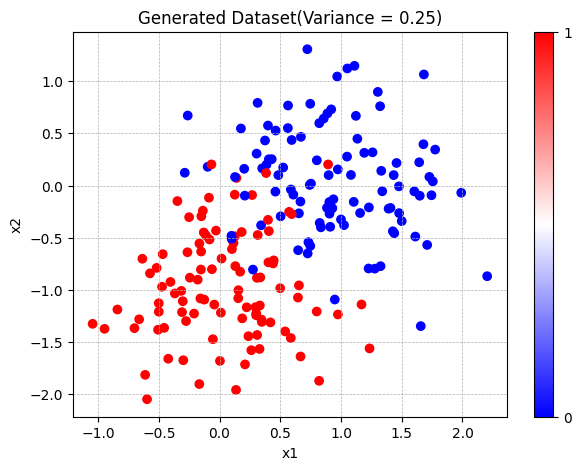

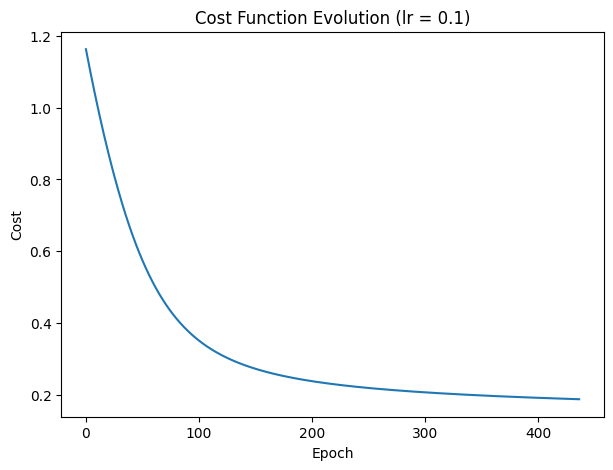

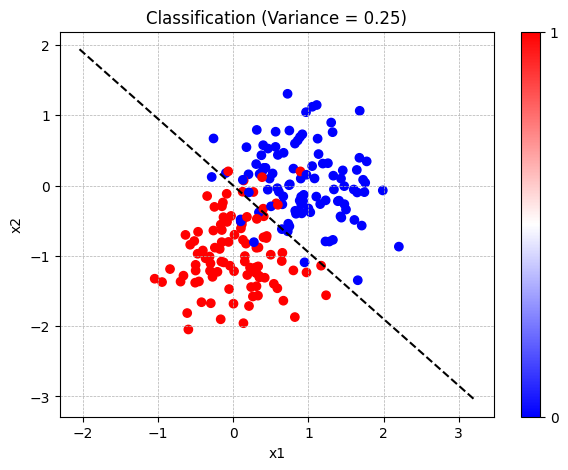

Accuracy: 0.85, Precision: 0.9, Recall: 0.8181818181818182


In [ ]:
# Your Hyperparameters
lr = 0.1
var1 = 0.25
main(lr, var1)

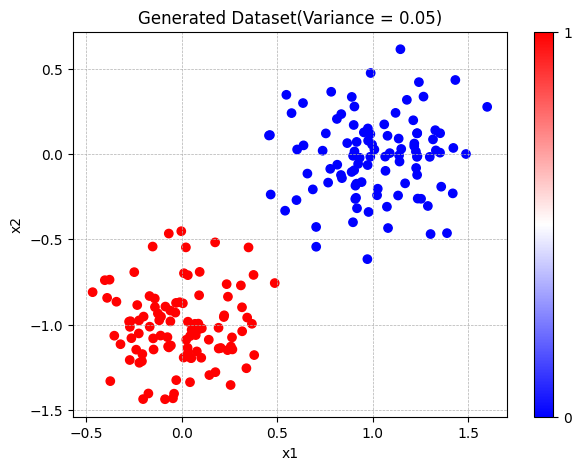

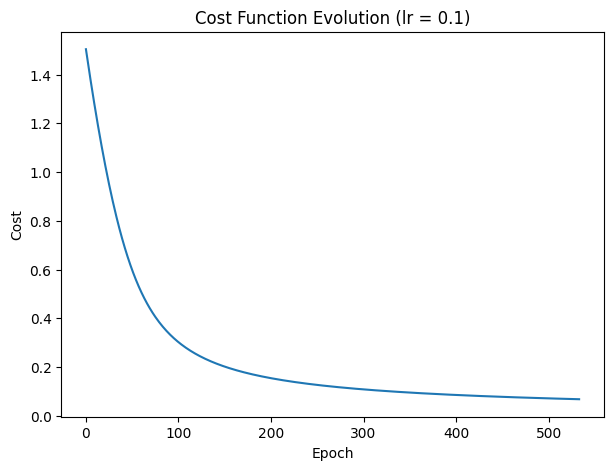

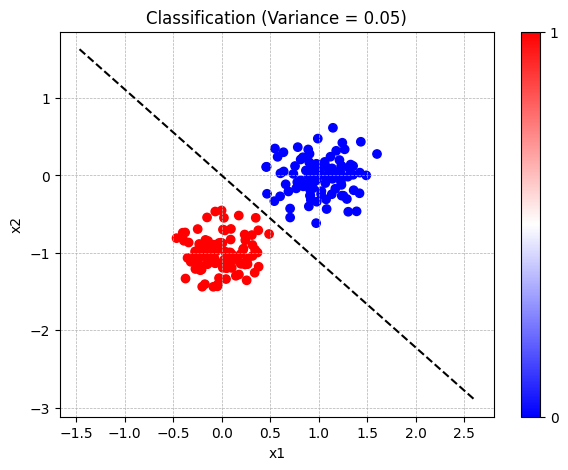

Accuracy: 1.0, Precision: 1.0, Recall: 1.0


In [ ]:
lr = 0.1
var2 = 0.05
main(lr, var2)

**Comment:**

A) The model is likely to be more robust and generalizes better for the case with lower variance.
B) Logistic Regression and SVM generally provide better accuracy than the Perceptron, especially in complex datasets.
The SVM model may outperform both due to its ability to find optimal margins.

# Part 2: Dealing with categorical data

A categorical variable can take on values on a finite set of fixed possible values. Samples from categorical assign each element to a particular group or nominal category on the basis of some qualitative property.

## Question 3:

Here you will predict the survival score of a passenger of the titanic disaster.

You will choose the prediciton variables $x$ from the available options and apply logistic regression on it to regress the 'survival' variable.

Here we have two types of variables: Numerical and categorical. For instance, the passenger Age can be an integer $\in [0, 120]$. The passenger class, on the other hand, can only be represented by $3$ values. The passenger sex by $2$ values.


Below are the functions that download and preprocess the data.


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

gdd.download_file_from_google_drive(file_id='1zilQH06ud0nzmmqLUwCnwDHdJkNICBU4',
                                    dest_path='./titanic/data.zip',
                                    unzip=True)
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# preprocess data

train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)

train = train[train['Age'].notna()]
test = test[test['Age'].notna()]


train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

test['Fare'].fillna(test['Fare'].mean(),inplace=True)

# Feature encoding: Convert 'Sex' to binary (0 for male, 1 for female)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

<ipython-input-46-c6ce0bcdbe87>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
<ipython-input-46-c6ce0bcdbe87>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Categorical Values:

Training data shape:  (714, 11)


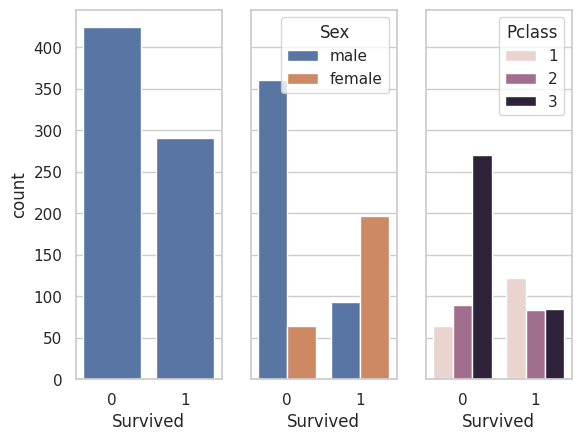

In [ ]:
print('Training data shape: ', train.shape)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x = 'Survived',data = train, ax = ax1)
sns.countplot(x = 'Survived',hue = 'Sex',data = train, ax = ax2)
sns.countplot(x = 'Survived',hue = 'Pclass',data = train, ax = ax3)

plt.show()

**Up to you**

Apply logistic regression on the training data to predict if a passenger survived or not given the variables of your choosing. A possible approach is to encode the categorical variables in an appropriate way such that logistic regression can be applied.

Justify your choices and validate your results using the validation dataset of your choosing.

Please, don't "waste" time finetuning your model, this is not a competition. Always remember that we just want to evaluate your understanding of the problem and theory.

**Optional**: If you want to compete, you can check the result of your model test prediction on the following kaggle challenge:

https://www.kaggle.com/c/titanic/data

You have to export the data on the corresponding data format.

In [ ]:
# Select the 3 most important features: 'Pclass', 'Fare', 'Sex'
X = train[['Pclass', 'Fare', 'Sex']].to_numpy()
y = train['Survived'].to_numpy()

# Split the data into training and validation sets (80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the test set
x_test = test[['Pclass', 'Fare', 'Sex']].to_numpy()

In [ ]:
# Training logistic regression model
W = logRegTrain(x_train.T, y_train.T, lr=0.01)[0]
y_pred_train, acc_train, P, R= logResTest(W, x_train.T, y_train.T)
print(f'Accuracy on the train set: {acc_train}')

# Making predictions on the validation set
y_pred_val, acc_val, P, R = logResTest(W, x_val.T, y_val.T)
print(f'Accuracy on the validation set: {acc_val}')

# Making predictions on the test set
y_pred_test = logResTest(W, x_test.T)

<ipython-input-3-88b18ce13fcf>:17: RuntimeWarning: divide by zero encountered in log
  J = -np.mean(Y * np.log(h) + (1 - Y) * np.log(1 - h))
<ipython-input-3-88b18ce13fcf>:17: RuntimeWarning: invalid value encountered in multiply
  J = -np.mean(Y * np.log(h) + (1 - Y) * np.log(1 - h))


Accuracy on the train set: 0.7338003502626971
Accuracy on the validation set: 0.7552447552447552


Print the Confusion matrix of your prediction

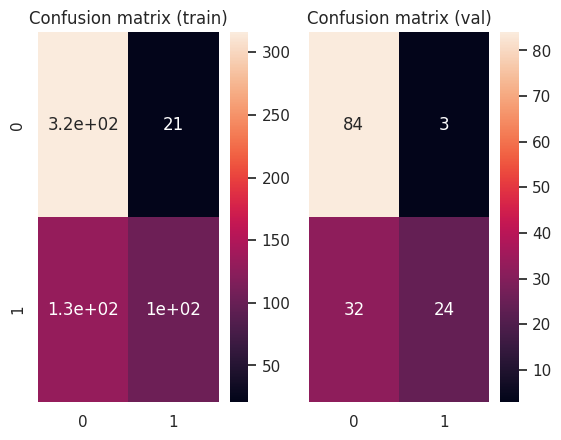

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Get the confusion matrix
cf_matrix_test = confusion_matrix(y_val, y_pred_val)

# Plot with sns

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.heatmap(cf_matrix_train, annot=True, ax = ax1).set(title='Confusion matrix (train)')
sns.heatmap(cf_matrix_test, annot=True, ax = ax2).set(title='Confusion matrix (val)')


plt.show()

# Part 3: Linear Regression for Housing Prices prediction

Linear regression is a common statistical tool for modeling the relationship between some “explanatory” variables and some real valued outcome.

The hypothesis class of linear regression predictors is simply the set of linear
functions:

The hypothesis class $\mathcal{H}_W$ is defined as the set of functions parametrized by $W$:

$$\mathcal{H}_W = \{x \mapsto \langle W, x \rangle : W \in \mathbb{R}^d \}$$

A common loss function is the squared loss:

$$
l_{mse}(h,(x, y)) = (h(x) − y)^2
$$

The corresponding empirical risk function is called the Mean Squared
Error, namely,

$$\mathcal{L}_S(h) = \frac{1}{m} \sum^N_{i=1}(h(x_i) - y_i)^2
$$

There are different loss functions and different optimization techniques to obtain an empirical risk minimizer, if appropriate.

Here you will use linear regression as offered by sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Data is found in the Kaggle website : https://www.kaggle.com/datasets/vedavyasv/usa-housing

## Question 4:
- Load the data
- Remove the last column (address)
- Plot the correlation matrix for the data, in order to see how the variables are correlated with each other. Comment the result.
- Split the data into a training set and a test set (75/25)
- Predict the price of houses with linear regression model.
- Compute the mean absolute error of the test set.
- Plot the actual price of the test data set versus its prediction. Comment the results.


In [14]:
import seaborn as sns
# Download and process the data :
df = pd.read_csv("https://www.kaggle.com/api/v1/datasets/download/vedavyasv/usa-housing/usa_housing.csv?filename=usa_housing.csv")
df.drop(columns = ['Address'], axis=1, inplace=True)
df.dropna(inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


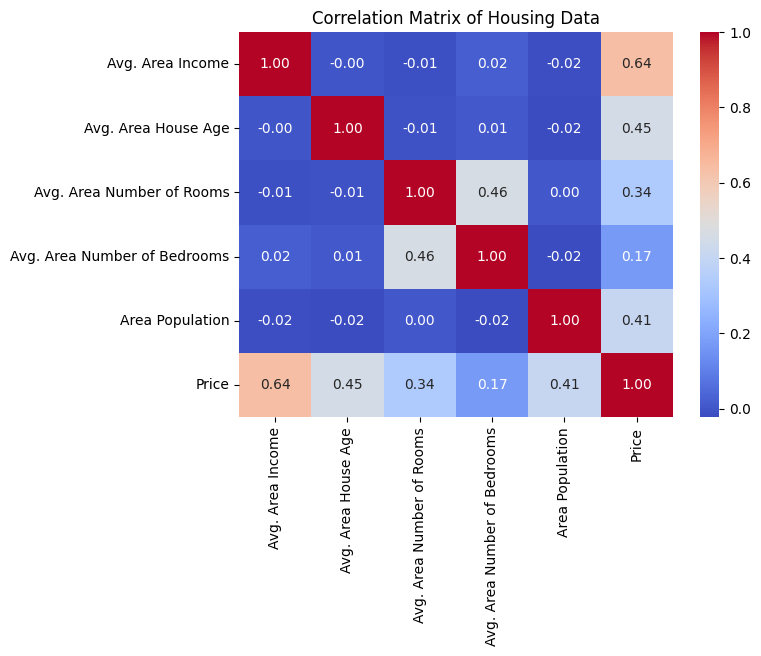

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(7, 5))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

We find a strong positive correlation between Avg. Area Income and Price. This suggests that as the average income of an area increases, the housing prices in that area tend to increase as well, which is a common trend in real estate. We also notice a strong positive correlation between the Avg. Area House Age and Price. Houses with more age often have higher prices.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
def main(df):
  # Split the data into training and test sets
  train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
  x_train = train_data.drop(columns=['Price'])
  y_train = train_data['Price']
  x_test = test_data.drop(columns=['Price'])
  y_test = test_data['Price']
  lin_reg = LinearRegression()
  lin_reg.fit(x_train, y_train)
  y_pred = lin_reg.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f'Mean Absolute Error: {mae}')

  # Plot actual vs predicted prices
  plt.figure(figsize=(7, 5))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot of actual vs predicted
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line for reference
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title("Actual vs Predicted House Prices")
  plt.grid(True, linestyle='--', linewidth=0.5)
  plt.legend(['Actual vs Predicted', 'Diagonal Line (Reference)'])
  plt.show()
  pass

Mean Absolute Error: 80859.62543687937


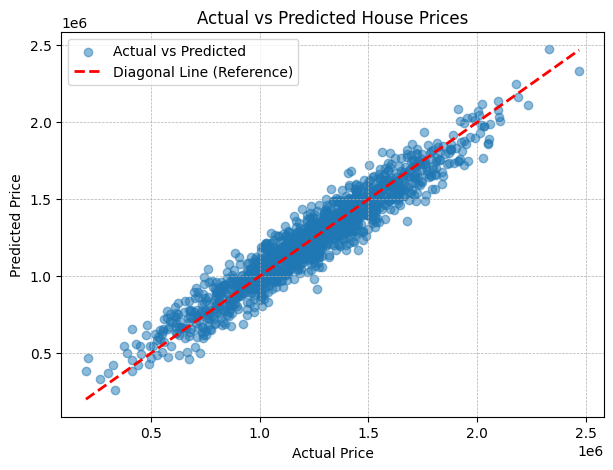

In [34]:
main(df)

**Comment:**

A scatter plot should ideally show points clustered around the diagonal line (where predicted prices equal actual prices). The closer the predictions are to the actual values, the better the model has performed.

## References :
- Chapter 9 of the book : Understanding Machine Learning


# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**